# Clustering Antartic Penguin Species

Gustavo Gutierrrez Navarro

01/09/2024

---

## 1. Librerias
---

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

## 2. Dataset
---

In [5]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 3. Análisis exploratorio de datos
---


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [21]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 3.1 Valores faltantes

In [7]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


### 3.2 Variables numéricas
Explorar la distribución de las variables y detectar valores extremos.

In [ ]:
numeric_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

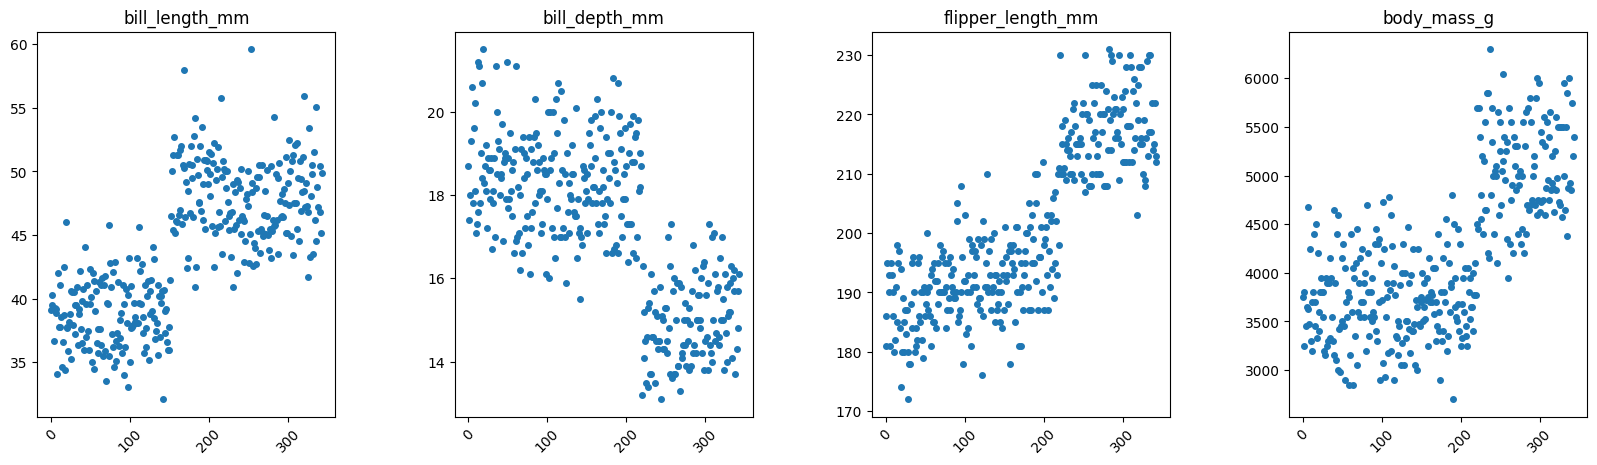

In [11]:
fig = plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_vars):
    ax_i = fig.add_subplot(1, len(numeric_vars), i + 1)
    ax_i.set_title(col)
    ax_i.plot(df[col], marker='o', linewidth=0, markersize=4)

plt.subplots_adjust(wspace=0.4)

for ax in fig.get_axes():
    ax.tick_params(axis='x', rotation=45)

plt.show()

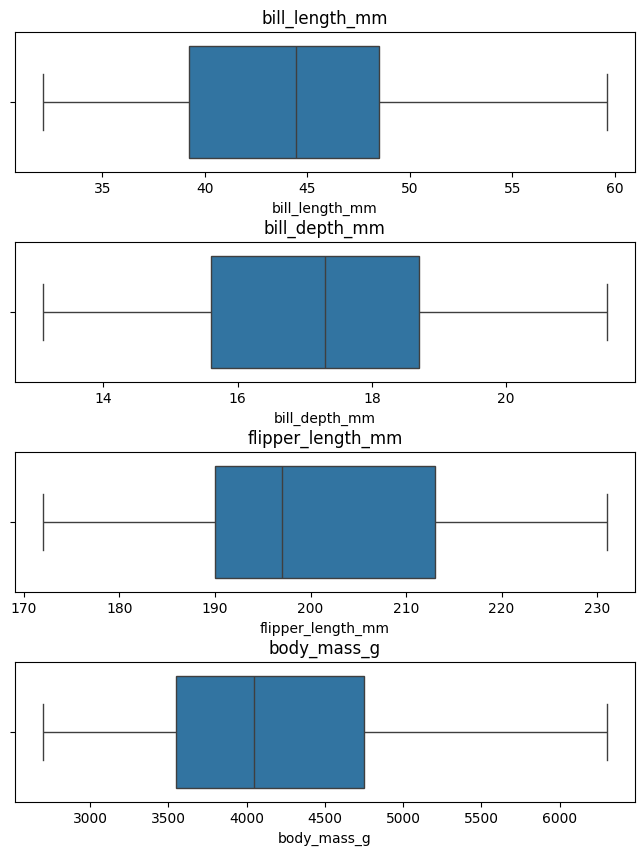

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=1 , figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(numeric_vars):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

### 3.3 Variables categóricas
Explorar las distintas variables categóricas para determinar su tipo y comportamiento ademas detectar repetición de respuestas.

C:\Users\gusta\AppData\Local\Temp\ipykernel_24544\4290928925.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\gusta\AppData\Local\Temp\ipykernel_24544\4290928925.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\gusta\AppData\Local\Temp\ipykernel_24544\4290928925.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


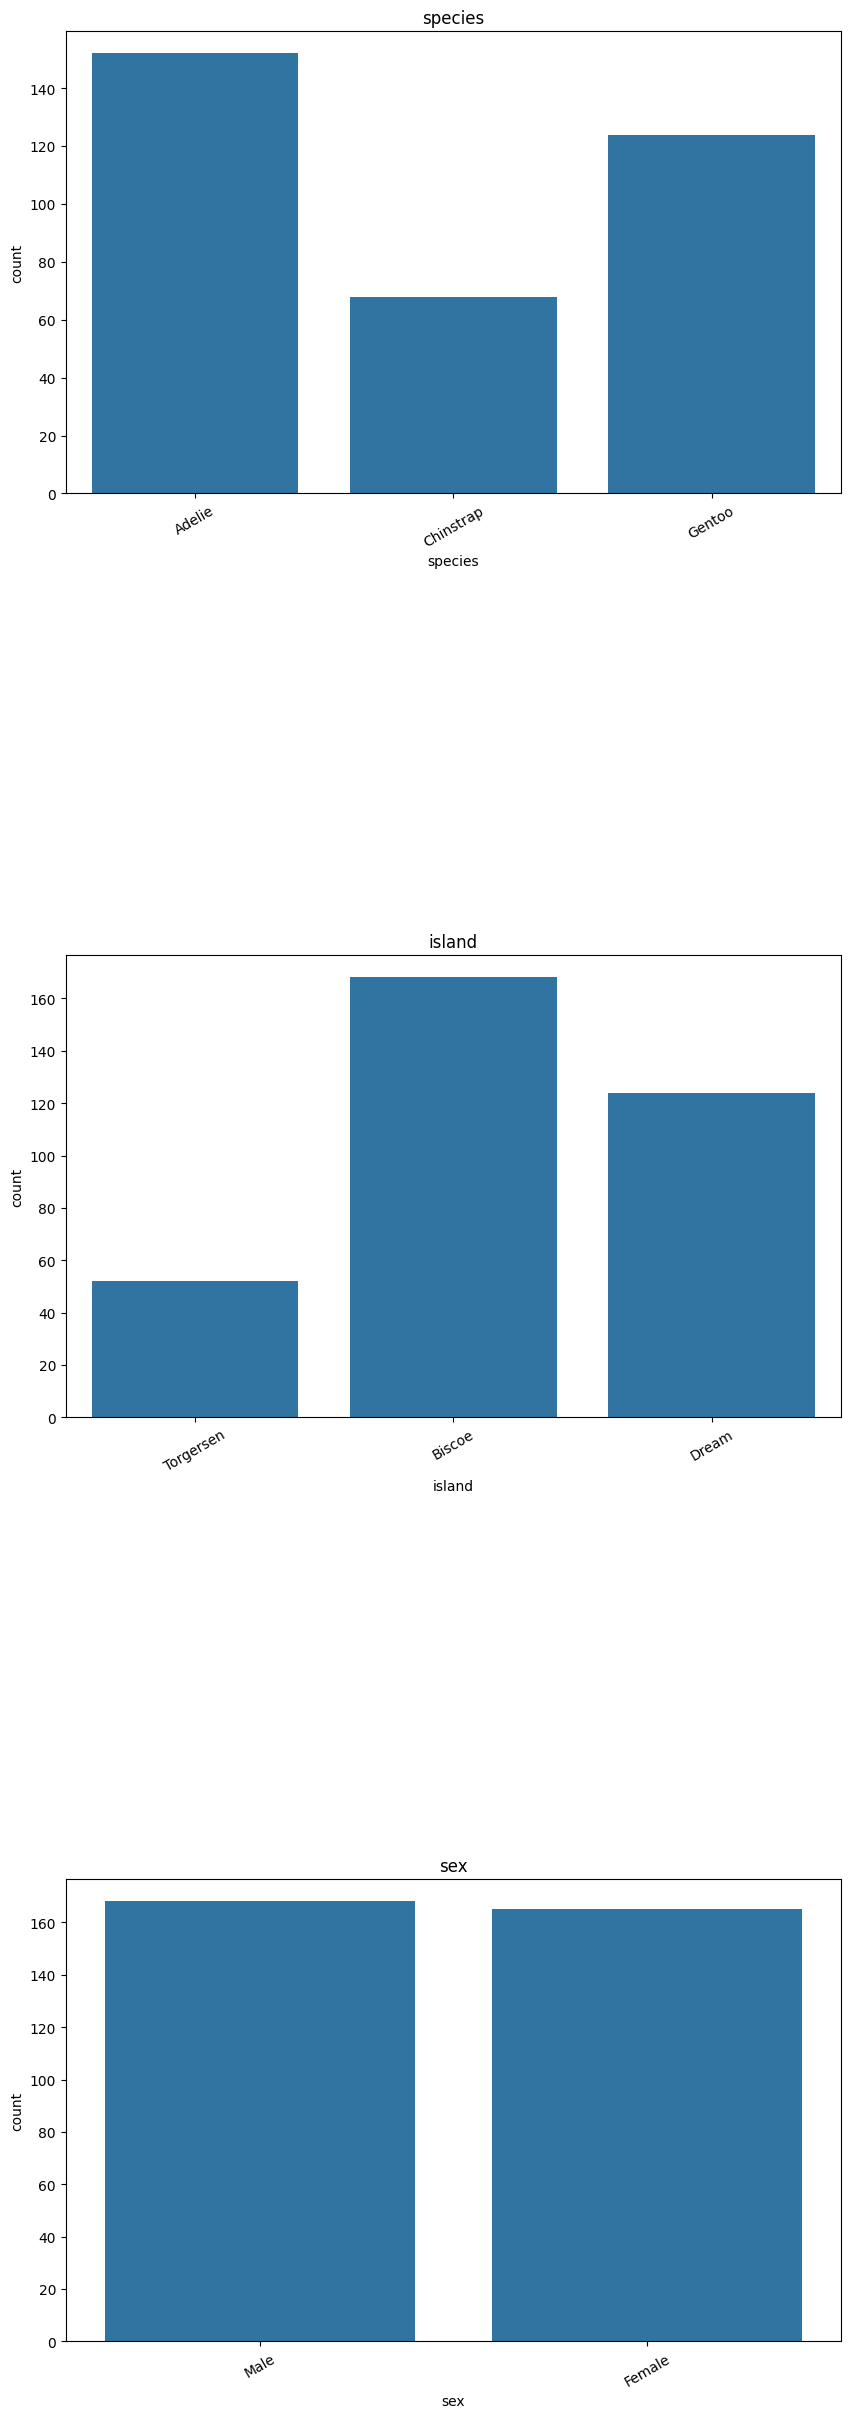

In [10]:
cols_cat = ['species', 'island', 'sex']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

### 3.5 Resumen
*Durante el análisis exploratorio de datos se encontraron los siguientes puntos a tomar en cuenta:*

- Es necesario lidiar con los valores perdidos. Como el número es bajo, se tomarán las siguientes acciones:
    - Para las 4 variables numéricas (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) se hará una imputación por la media.
    - Para la variable sex se utilizará la moda para imputar.

- Al ser este un ejercicio de clustering y, por lo tanto, no supervisado, la variable categórica species será retirada y guardada únicamente para evaluar la eficiencia final de nuestro clúster.

- La variable sex será reemplazada por los valores 0 (masculino) y 1 (femenino).

- La variable island será eliminada para evitar sesgos.

- Para la distribución se utilizará una estándar para manejar los datos de mejor manera.

## 4. Limpieza de datos
---

### 4.1 Retirar la variable objetivo

In [17]:
target = df['species']

df.drop('species', axis=1, inplace=True)

### 4.2 Eliminar variables

In [18]:
df.drop('island', axis=1, inplace=True)

### 4.3 Imputación de datos

In [ ]:
df.bill_length_mm.fillna(df.bill_length_mm.mean(), inplace=True)
df.bill_depth_mm.fillna(df.bill_depth_mm.mean(), inplace=True)
df.flipper_length_mm.fillna(df.flipper_length_mm.mean(), inplace=True)
df.body_mass_g.fillna(df.body_mass_g.mean(), inplace=True)

In [22]:
df.sex.describe()

count      333
unique       2
top       Male
freq       168
Name: sex, dtype: object

In [23]:
df.sex.fillna('Male', inplace=True)

### 4.4 Manejo de variables categóricas

In [24]:
df["sex"].replace({"Male":0, "Female":1}, inplace=True)

### 4.5 Estandarización de datos 

In [31]:
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(df[numeric_vars])

df_standardized = pd.DataFrame(standardized_data, columns=numeric_vars)
df.drop(columns=numeric_vars, inplace=True)

df = pd.concat([df_standardized, df], axis="columns")

### 4.6 Resumen de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB
None


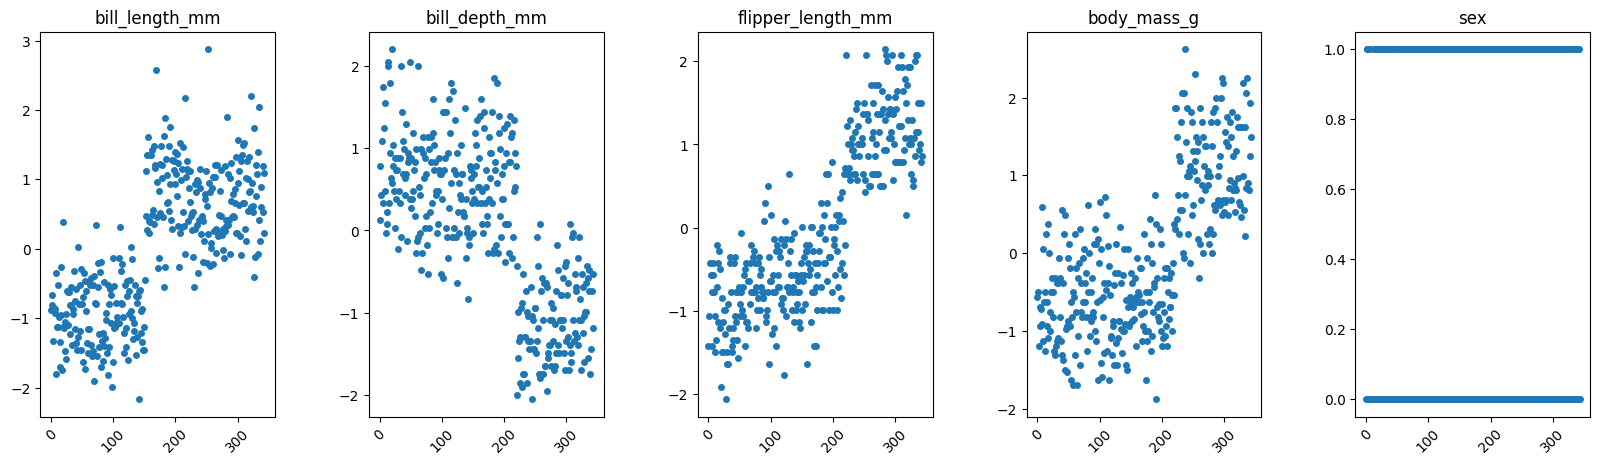

In [32]:
print(df.info())

fig = plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns.tolist()):
    ax_i = fig.add_subplot(1, len(df.columns), i + 1)
    ax_i.set_title(col)
    ax_i.plot(df[col], marker='o', linewidth=0, markersize=4)

plt.subplots_adjust(wspace=0.4)

for ax in fig.get_axes():
    ax.tick_params(axis='x', rotation=45)

plt.show()

## 5. Clustering

## 6. Evaluación del modelo